In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [26]:
full_data=pd.read_csv('Non_Linear_data.csv')
full_data

,input_feature,target
0,-1.398471,-3.743391
1,-1.396127,-3.690088
2,-1.392431,-3.114289
3,-1.389191,-3.710108
4,-1.386853,-3.778803
...,...,...
995,1.384322,1.691772
996,1.394294,1.199409
997,1.396772,1.508899
998,1.397978,1.812922


In [27]:
data = full_data.iloc[:, 0].values.reshape((-1, 1))
target=full_data.iloc[:, 1].values

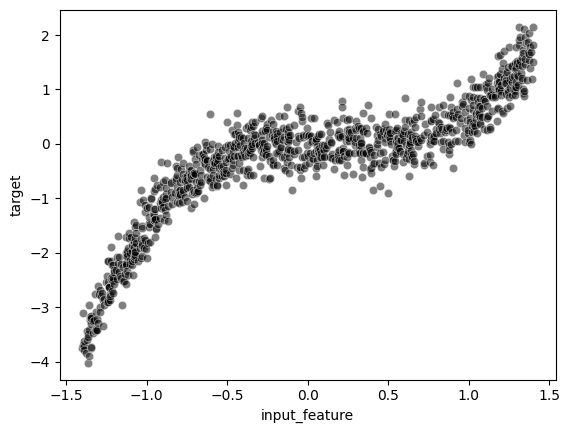

In [28]:
_ = sns.scatterplot(
    data=full_data, x="input_feature", y="target", color="black", alpha=0.5
)

In [38]:
#data_expanded = np.concatenate([data, data**2, data**3], axis=1)
#data_expanded.shape

(1000, 3)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [32]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression(),
)
polynomial_regression

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [33]:
polynomial_regression.fit(X_train,y_train)
target_predicted = polynomial_regression.predict(X_test)
X_pred=polynomial_regression.predict(X_train)

train_mse=mean_squared_error(y_train,X_pred)
test_mse = mean_squared_error(y_test, target_predicted)

In [34]:
X_pred.shape

(800,)

In [35]:
print("Train MSE =",train_mse)
print("Test MSE =",test_mse)

Train MSE = 0.08747037380049337
Test MSE = 0.06971124730349676


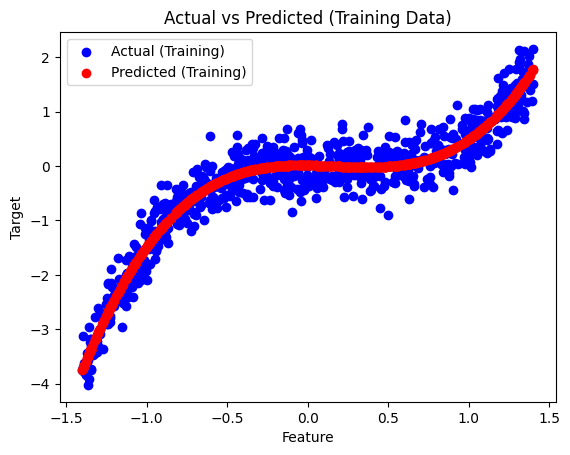

In [36]:
# Plotting for training data
plt.scatter(X_train, y_train, color='blue', label='Actual (Training)')
plt.scatter(X_train, X_pred, color='red',  label='Predicted (Training)')
plt.title('Actual vs Predicted (Training Data)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

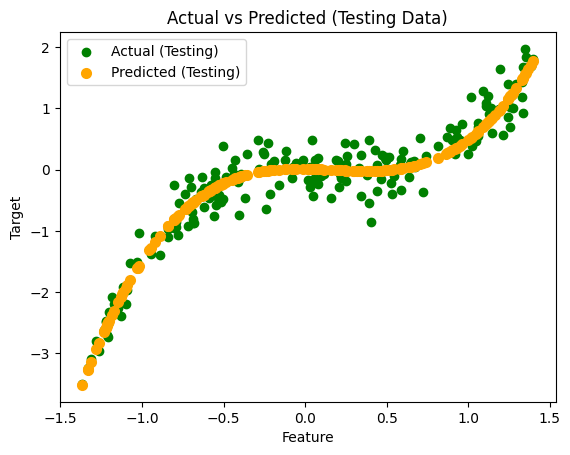

In [37]:
# Plotting for testing data
plt.scatter(X_test, y_test, color='green', label='Actual (Testing)')
plt.scatter(X_test,target_predicted , color='orange', linewidth=2, label='Predicted (Testing)')
plt.title('Actual vs Predicted (Testing Data)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()